In [1]:
##import packages
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import sys


**Import the customer churn data set.  This data is from kaggle:  https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data**

In [2]:
churn_df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#data appears to be complete, but will double check that there are no missing values
missing = churn_df.isnull().sum()  #count missing values
missing

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
churn_df.shape

(7043, 21)

In [8]:
#review the categorical columns to determine the number of unique values for each. The service offerings for example should only have 2 values yes or no.
churn_df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV' , 'StreamingMovies',
                'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']].nunique()

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

**Several of the service offerings (multiple lines, online security, device protection, etc) have more than 2 values.  Yes and No were the expected values.  More digging is needed to see what the values are.**

In [9]:
pd.unique(churn_df['MultipleLines'])

array(['No phone service', 'No', 'Yes'], dtype=object)

In [10]:
pd.unique(churn_df['InternetService'])

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [11]:
pd.unique(churn_df['OnlineSecurity'])

array(['No', 'Yes', 'No internet service'], dtype=object)

In [12]:
pd.unique(churn_df['OnlineBackup'])

array(['Yes', 'No', 'No internet service'], dtype=object)

In [13]:
pd.unique(churn_df['DeviceProtection'])

array(['No', 'Yes', 'No internet service'], dtype=object)

In [14]:
pd.unique(churn_df['StreamingTV'])

array(['No', 'Yes', 'No internet service'], dtype=object)

In [15]:
pd.unique(churn_df['StreamingMovies'])

array(['No', 'Yes', 'No internet service'], dtype=object)

In [16]:
pd.unique(churn_df['Contract'])

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [17]:
pd.unique(churn_df['PaymentMethod'])

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [18]:
pd.unique(churn_df['gender'])

array(['Female', 'Male'], dtype=object)

In [19]:
pd.unique(churn_df['SeniorCitizen'])

array([0, 1], dtype=int64)

In [20]:
pd.unique(churn_df['Partner'])

array(['Yes', 'No'], dtype=object)

In [21]:
pd.unique(churn_df['Dependents'])

array(['No', 'Yes'], dtype=object)

In [22]:
pd.unique(churn_df['PhoneService'])

array(['No', 'Yes'], dtype=object)

In [23]:
pd.unique(churn_df['PaperlessBilling'])

array(['Yes', 'No'], dtype=object)

In [68]:
# comparing the average monthly charge for each customer type and whether they churned or not
print(pd.pivot_table(churn_df, index='Churn', columns = 'PhoneService', values = 'MonthlyCharges', aggfunc='mean'))
print()
print(pd.pivot_table(churn_df, index='Churn', columns = 'PhoneService', values = 'MonthlyCharges', aggfunc='count'))
print()
print(pd.pivot_table(churn_df, index='Churn', columns = 'InternetService', values = 'MonthlyCharges', aggfunc='mean'))
print()
print(pd.pivot_table(churn_df, index='Churn', columns = 'InternetService', values = 'MonthlyCharges', aggfunc='count'))
print()
print(pd.pivot_table(churn_df, index='Churn', columns = 'gender', values = 'MonthlyCharges', aggfunc='mean'))
print()
print(pd.pivot_table(churn_df, index='Churn', columns = 'gender', values = 'MonthlyCharges', aggfunc='count'))
print()
print(pd.pivot_table(churn_df, index='Churn', columns = 'SeniorCitizen', values = 'MonthlyCharges', aggfunc='mean'))
print()
print(pd.pivot_table(churn_df, index='Churn', columns = 'SeniorCitizen', values = 'MonthlyCharges', aggfunc='count'))



PhoneService         No        Yes
Churn                             
No            43.520996  63.213857
Yes           37.533824  78.134255

PhoneService   No   Yes
Churn                  
No            512  4662
Yes           170  1699

InternetService        DSL  Fiber optic         No
Churn                                             
No               60.212105    93.932379  21.136058
Yes              49.083224    88.126484  20.368142

InternetService   DSL  Fiber optic    No
Churn                                   
No               1962         1799  1413
Yes               459         1297   113

gender     Female       Male
Churn                       
No      61.664908  60.876914
Yes     74.812087  74.066989

gender  Female  Male
Churn               
No        2549  2625
Yes        939   930

SeniorCitizen          0          1
Churn                              
No             58.618123  79.182057
Yes            72.298098  80.713445

SeniorCitizen     0    1
Churn               

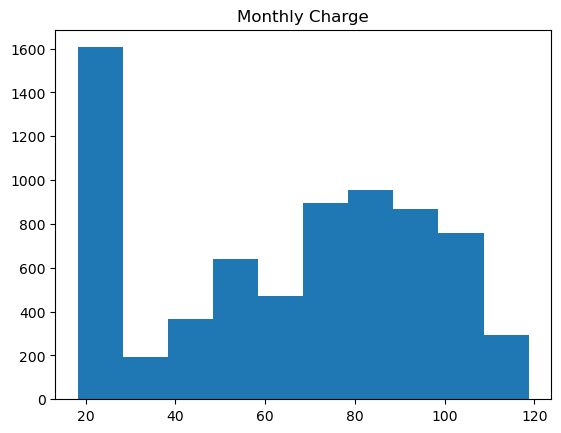

In [69]:
# take a look at the distribution for the monthly charges for dataset as a whole
plt.hist(churn_df['MonthlyCharges'])
plt.title('Monthly Charge')
plt.show()

# Initial thoughts of dataset
Gender doesn't appear to play any part in whether a customer churns or not.  When looking at Phone services, it would appear that the customers who churned had an average monthly charge of $78 vs $63 for those who didn't.  As it relates to internet service, those on Fiber Optic are paying the most each month with an avg monthly charge of $88.13 as well as the most likely to churn.  We will also dig deeper into the various streaming services during the data exploration, to see if they follow suit or contribute to the high churn rate within internet service.

There appear to be two major service categories.  They are Phone service and Internet Service.  Then within those services, there are subcategories of services.  For example for Phone, the subcategory is Multiple lines.  

For Internet the subcategory services are StreamingTV, StreamingMovies, OnlineBackup, OnlineSecurity and DeviceProtection.  These columns will need to be converted to numeric data prior to training ml models.
In addition to converting the categorical columns into numeric values, the TotalCharges column currently has an object dtype.  It will also need to be converted to float.
An additional column should be added to the dataset to count the number of services each customer is enrolled.  As that could potentially be related to churn.
The first step will be to convert the categorical fields into numeric in order to perform counts.

In [24]:
# first step is to convert churn to numeric field where No=0 and Yes=1
# create dictionary for mapping categorical fields with non-numeric data containing yes and no values.  
categorical_dictionary = {"No": 0, "No internet service":0, "No phone service":0,"Yes":1}
# create new dictionary for gender
gender_dictionary = {"Male": 1, "Female":0}
# create new dictionary for contract type
contract_dictionary = {"Month-to-month": 0, "One year":1, "Two year":2}
# create new dictionary for payment method
pay_method_dictionary = {"Electronic check": 0, "Mailed check":1, "Bank transfer (automatic)":2, "Credit card (automatic)":3}
#create new dictionary for internet service types
internet_service_dictionary = {"No":0, "DSL":1, "Fiber optic":2}

In [25]:
#use the new categorical dictionary to add numeric fields for the following columns: 
#'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV' , 'StreamingMovies','PaperlessBilling' and 'Churn'
churn_df['Churn_num']=churn_df['Churn'].map(categorical_dictionary)
churn_df['Partner_num']=churn_df['Partner'].map(categorical_dictionary)
churn_df['Dependents_num']=churn_df['Dependents'].map(categorical_dictionary)
churn_df['PhoneService_num']=churn_df['PhoneService'].map(categorical_dictionary)
churn_df['MultipleLines_num']=churn_df['MultipleLines'].map(categorical_dictionary)
churn_df['OnlineSecurity_num']=churn_df['OnlineSecurity'].map(categorical_dictionary)
churn_df['OnlineBackup_num']=churn_df['OnlineBackup'].map(categorical_dictionary)
churn_df['DeviceProtection_num']=churn_df['DeviceProtection'].map(categorical_dictionary)
churn_df['TechSupport_num']=churn_df['TechSupport'].map(categorical_dictionary)
churn_df['StreamingTV_num']=churn_df['StreamingTV'].map(categorical_dictionary)
churn_df['StreamingMovies_num']=churn_df['StreamingMovies'].map(categorical_dictionary)
churn_df['PaperlessBilling_num']=churn_df['PaperlessBilling'].map(categorical_dictionary)

#add numeric column for types of internet service column
churn_df['InternetService_num']=churn_df['InternetService'].map(internet_service_dictionary)
#add numeric column for gender column
churn_df['gender_num']=churn_df['gender'].map(gender_dictionary)
#add numeric column for churn contract type column
churn_df['Contract_num']=churn_df['Contract'].map(contract_dictionary)
#add numeric column for payment method column
churn_df['PaymentMethod_num']=churn_df['PaymentMethod'].map(pay_method_dictionary)

In [26]:
# additional data points that may provide insights include a column indicating if the customer has both phone and internet service
# add a new column indicating Phone_Internet by adding the column values together.  Where 1 = yes and 0 = no
churn_df["Phone_Internet"] = churn_df['PhoneService_num']+churn_df["InternetService_num"].median() - 1
#another datapoint that may be relevant is the total number of services the custmer subscribes to. We will add a new column with the total # of services
service_columns = ['PhoneService_num', 'MultipleLines_num', 'OnlineSecurity_num', 'OnlineBackup_num', 'DeviceProtection_num', 'TechSupport_num', 'StreamingTV_num', 'StreamingMovies_num','InternetService_num']
churn_df["Number_of_Services"] = churn_df[service_columns].sum(axis=1)

In [27]:
churn_df.shape

(7043, 39)

In [28]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport_num,StreamingTV_num,StreamingMovies_num,PaperlessBilling_num,InternetService_num,gender_num,Contract_num,PaymentMethod_num,Phone_Internet,Number_of_Services
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0,0,0,1,1,0,0,0,0.0,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,0,0,0,0,1,1,1,1,1.0,4
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,0,0,0,1,1,1,0,1,1.0,4
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,1,0,0,0,1,1,1,2,0.0,4
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0,0,0,1,2,0,0,0,1.0,3


In [29]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn_num,Partner_num,Dependents_num,PhoneService_num,MultipleLines_num,OnlineSecurity_num,OnlineBackup_num,...,TechSupport_num,StreamingTV_num,StreamingMovies_num,PaperlessBilling_num,InternetService_num,gender_num,Contract_num,PaymentMethod_num,Phone_Internet,Number_of_Services
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.00000
mean,0.162147,32.371149,64.761692,0.265370,0.483033,0.299588,0.903166,0.421837,0.286668,0.344881,...,0.290217,0.384353,0.387903,0.592219,1.222916,0.504756,0.690473,1.315633,0.903166,4.58583
std,0.368612,24.559481,30.090047,0.441561,0.499748,0.458110,0.295752,0.493888,0.452237,0.475363,...,0.453895,0.486477,0.487307,0.491457,0.778877,0.500013,0.833755,1.148907,0.295752,2.55023
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.000000,9.000000,35.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.00000
50%,0.000000,29.000000,70.350000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,5.00000
75%,0.000000,55.000000,89.850000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,7.00000
max,1.000000,72.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,1.000000,10.00000


Now that we have converted the columns to numeric, we can take a quick view of some churn stats
 - number of churned customers vs non customers in the dataset
 - churn by service category (phone vs internet)
 - average monthly charges by churned vs remaining customers

Text(0.5, 1.0, 'Customer Churn Counts')

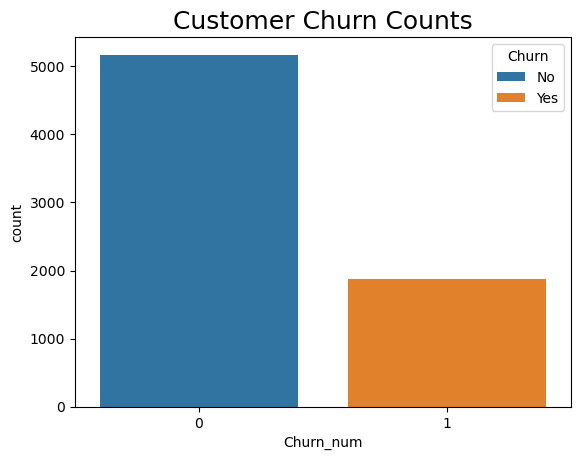

In [32]:
sns.countplot(data=churn_df, x='Churn_num', hue='Churn', stat="count")
plt.title('Customer Churn Counts', fontsize=18)

Text(0.5, 1.0, 'Customer Churn Percentages')

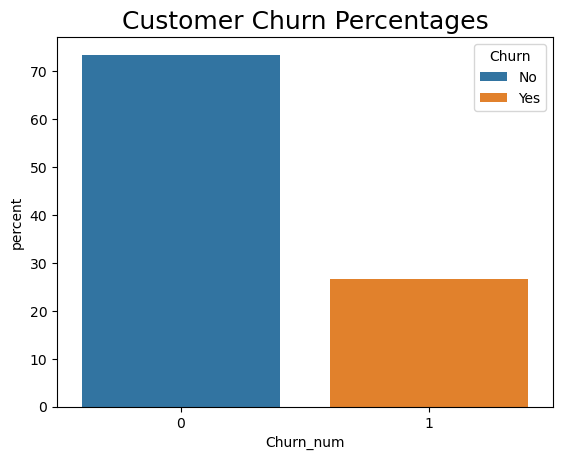

In [35]:
sns.countplot(data=churn_df, x='Churn_num', hue='Churn', stat="percent")
plt.title('Customer Churn Percentages', fontsize=18)

In [43]:
#filter into a new dataframe with only phone service customers
phone_only_df = churn_df[(churn_df['PhoneService_num']==1) & (churn_df['InternetService_num']==0)]

In [44]:
phone_only_df.shape

(1526, 39)

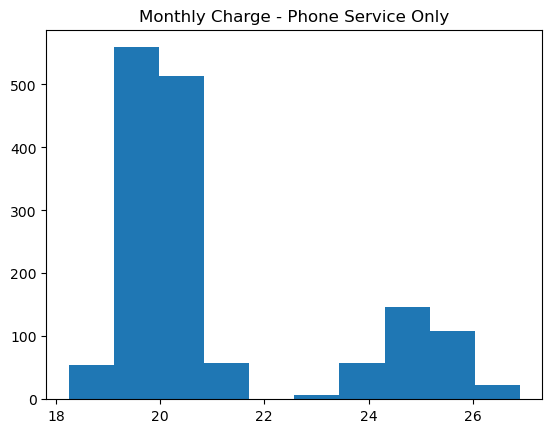

In [70]:
# take a look at the distribution for the monthly charges for phone service only customers
plt.hist(phone_only_df['MonthlyCharges'])
plt.title('Monthly Charge - Phone Service Only')
plt.show()

In [45]:
#Break down of churn percentages for Phone, Internet and those with both services

Text(0.5, 1.0, 'Customer Churn Percentages - Phone Service')

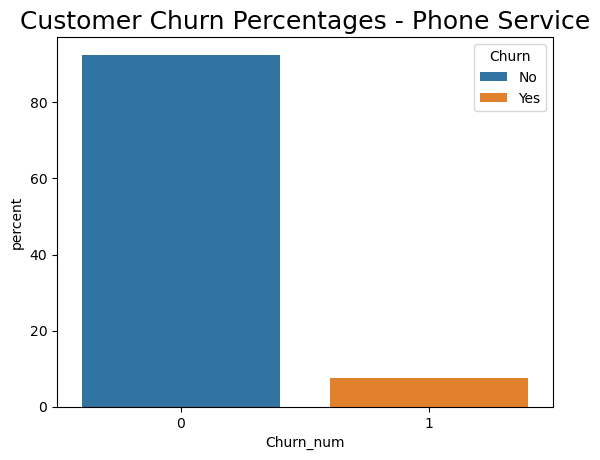

In [46]:
#phone service customers churn percentage
sns.countplot(data=phone_only_df, x='Churn_num', hue='Churn', stat="percent")
plt.title('Customer Churn Percentages - Phone Service', fontsize=18)

In [54]:
phone_only_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn_num,Partner_num,Dependents_num,PhoneService_num,MultipleLines_num,OnlineSecurity_num,OnlineBackup_num,...,TechSupport_num,StreamingTV_num,StreamingMovies_num,PaperlessBilling_num,InternetService_num,gender_num,Contract_num,PaymentMethod_num,Phone_Internet,Number_of_Services
count,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.0,1526.000000,1526.0,1526.0,...,1526.0,1526.0,1526.0,1526.000000,1526.0,1526.000000,1526.000000,1526.000000,1526.0,1526.000000
mean,0.034076,30.547182,21.079194,0.074050,0.483617,0.421363,1.0,0.224115,0.0,0.0,...,0.0,0.0,0.0,0.292267,0.0,0.510485,1.074705,1.571429,1.0,1.224115
std,0.181484,24.356507,2.164221,0.261938,0.499895,0.493939,0.0,0.417135,0.0,0.0,...,0.0,0.0,0.0,0.454954,0.0,0.500054,0.869703,0.916055,0.0,0.417135
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.000000
25%,0.000000,8.000000,19.700000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,1.0,1.000000
50%,0.000000,25.000000,20.150000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,1.000000,1.000000,1.000000,1.0,1.000000
75%,0.000000,52.750000,20.900000,0.000000,1.000000,1.000000,1.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,1.000000,2.000000,2.000000,1.0,1.000000
max,1.000000,72.000000,26.900000,1.000000,1.000000,1.000000,1.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,1.000000,2.000000,3.000000,1.0,2.000000


In [47]:
#filter into a new dataframe with only internet service customers
internet_only_df = churn_df[(churn_df['InternetService_num']==1) & (churn_df['PhoneService_num']==0)]

In [48]:
internet_only_df.shape

(682, 39)

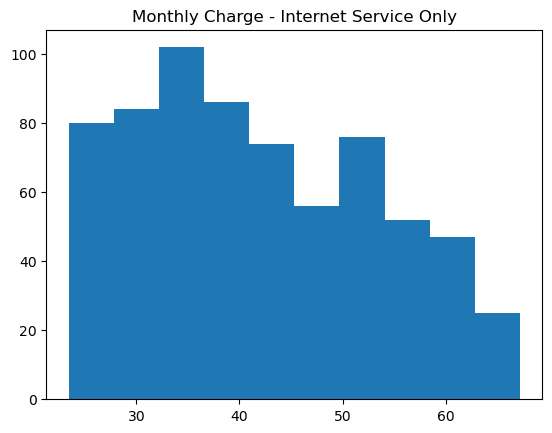

In [71]:
# take a look at the distribution for the monthly charges for Internet service only customers
plt.hist(internet_only_df['MonthlyCharges'])
plt.title('Monthly Charge - Internet Service Only')
plt.show()

Text(0.5, 1.0, 'Customer Churn Percentages - Internet Service')

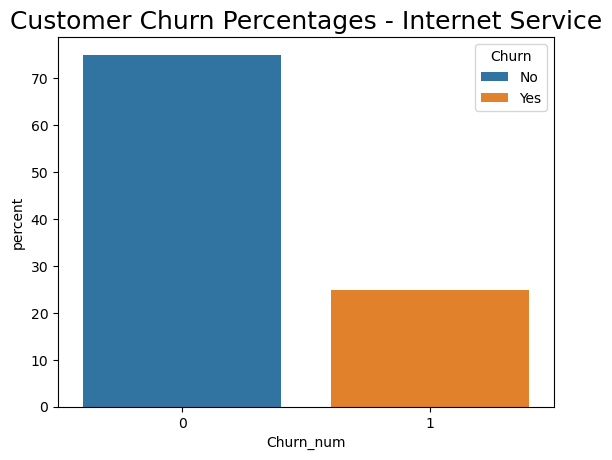

In [49]:
#internet service customers churn percentage
sns.countplot(data=internet_only_df, x='Churn_num', hue='Churn', stat="percent")
plt.title('Customer Churn Percentages - Internet Service', fontsize=18)

In [55]:
internet_only_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn_num,Partner_num,Dependents_num,PhoneService_num,MultipleLines_num,OnlineSecurity_num,OnlineBackup_num,...,TechSupport_num,StreamingTV_num,StreamingMovies_num,PaperlessBilling_num,InternetService_num,gender_num,Contract_num,PaymentMethod_num,Phone_Internet,Number_of_Services
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.0,682.0,682.000000,682.000000,...,682.000000,682.000000,682.000000,682.000000,682.0,682.000000,682.000000,682.000000,682.0,682.000000
mean,0.152493,31.737537,42.028592,0.249267,0.456012,0.302053,0.0,0.0,0.414956,0.420821,...,0.423754,0.417889,0.436950,0.567449,1.0,0.514663,0.684751,1.329912,0.0,3.561584
std,0.359762,24.233204,11.419585,0.432906,0.498427,0.459485,0.0,0.0,0.493076,0.494053,...,0.494515,0.493574,0.496373,0.495793,0.0,0.500152,0.830071,1.156460,0.0,1.623032
min,0.000000,0.000000,23.450000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,1.000000
25%,0.000000,8.000000,33.600000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,2.000000
50%,0.000000,29.000000,40.575000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.0,1.000000,0.000000,1.000000,0.0,4.000000
75%,0.000000,53.000000,50.737500,0.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,2.000000,0.0,5.000000
max,1.000000,72.000000,67.200000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,2.000000,3.000000,0.0,7.000000


In [50]:
#filter into a new dataframe with only phone and internet (bundle)customers
bundle_only_df = churn_df[(churn_df['InternetService_num']==1) & (churn_df['PhoneService_num']==1)]

In [51]:
bundle_only_df.shape

(1739, 39)

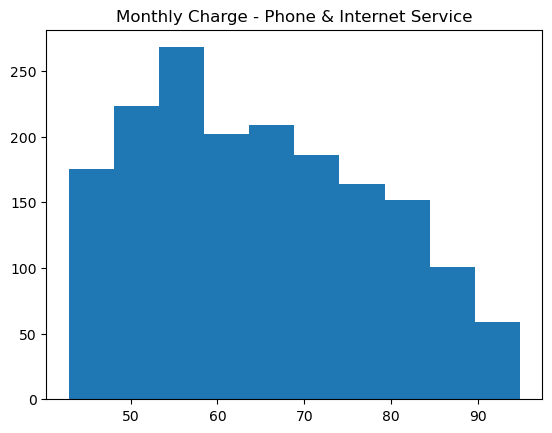

In [72]:
# take a look at the distribution for the monthly charges for phone & internet bundled services  customers
plt.hist(bundle_only_df['MonthlyCharges'])
plt.title('Monthly Charge - Phone & Internet Service')
plt.show()

Text(0.5, 1.0, 'Customer Churn Percentages - Phone & Internet Service')

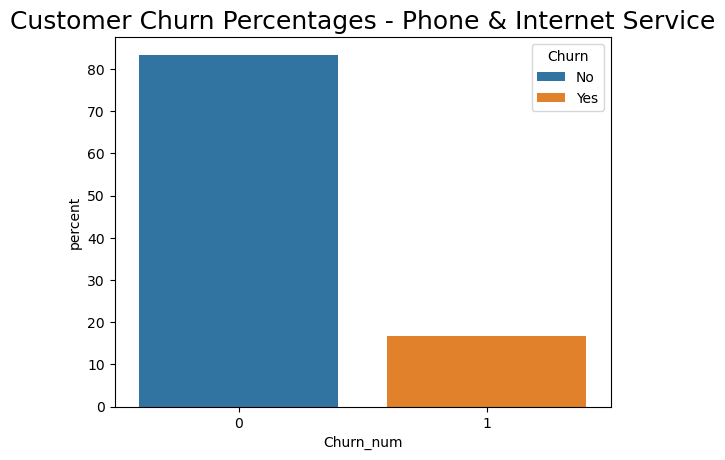

In [53]:
#phone and internet bundle service customers churn percentage
sns.countplot(data=bundle_only_df, x='Churn_num', hue='Churn', stat="percent")
plt.title('Customer Churn Percentages - Phone & Internet Service', fontsize=18)

In [56]:
bundle_only_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn_num,Partner_num,Dependents_num,PhoneService_num,MultipleLines_num,OnlineSecurity_num,OnlineBackup_num,...,TechSupport_num,StreamingTV_num,StreamingMovies_num,PaperlessBilling_num,InternetService_num,gender_num,Contract_num,PaymentMethod_num,Phone_Internet,Number_of_Services
count,1739.000000,1739.000000,1739.000000,1739.000000,1739.000000,1739.000000,1739.0,1739.000000,1739.000000,1739.000000,...,1739.000000,1739.000000,1739.000000,1739.000000,1739.0,1739.000000,1739.000000,1739.000000,1739.0,1739.000000
mean,0.089132,33.246694,64.405894,0.166187,0.492812,0.344451,1.0,0.397355,0.515814,0.459459,...,0.511213,0.386429,0.392754,0.542266,1.0,0.507188,0.781484,1.506613,1.0,5.100058
std,0.285016,25.029639,13.261756,0.372356,0.500092,0.475326,0.0,0.489491,0.499894,0.498497,...,0.500018,0.487071,0.488503,0.498354,0.0,0.500092,0.841585,1.114471,0.0,1.980426
min,0.000000,0.000000,42.900000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.0,2.000000
25%,0.000000,9.000000,54.150000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,1.0,3.000000
50%,0.000000,30.000000,63.700000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,5.000000
75%,0.000000,57.000000,74.825000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,2.000000,3.000000,1.0,7.000000
max,1.000000,72.000000,94.800000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,2.000000,3.000000,1.0,9.000000


In [57]:
#filter into a new dataframe with customers with multiple services (phone, internet, streaming, multiple phone lines, etc)
multiple_only_df = churn_df[churn_df['Number_of_Services']>1]

Text(0.5, 1.0, 'Customer Churn Percentages - Multiple Services')

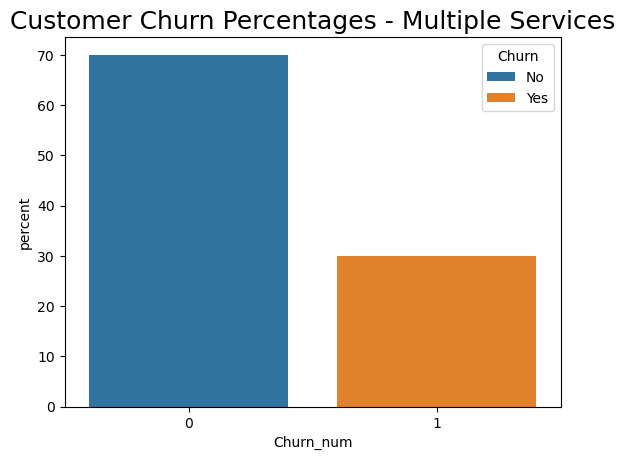

In [58]:
#Multiple services -  customers churn percentage
sns.countplot(data=multiple_only_df, x='Churn_num', hue='Churn', stat="percent")
plt.title('Customer Churn Percentages - Multiple Services', fontsize=18)

In [59]:
multiple_only_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn_num,Partner_num,Dependents_num,PhoneService_num,MultipleLines_num,OnlineSecurity_num,OnlineBackup_num,...,TechSupport_num,StreamingTV_num,StreamingMovies_num,PaperlessBilling_num,InternetService_num,gender_num,Contract_num,PaymentMethod_num,Phone_Internet,Number_of_Services
count,5779.000000,5779.000000,5779.000000,5779.000000,5779.000000,5779.000000,5779.000000,5779.000000,5779.000000,5779.000000,...,5779.000000,5779.000000,5779.000000,5779.000000,5779.000000,5779.000000,5779.000000,5779.000000,5779.000000,5779.000000
mean,0.189652,34.033051,74.493407,0.299533,0.496107,0.279979,0.895830,0.514103,0.349368,0.420315,...,0.353694,0.468420,0.472746,0.657726,1.476553,0.501990,0.648209,1.279806,0.895830,5.370133
std,0.392060,24.670296,23.985676,0.458093,0.500028,0.449028,0.305508,0.499844,0.476812,0.493652,...,0.478157,0.499045,0.499300,0.474512,0.606526,0.500039,0.821126,1.191332,0.305508,2.120924
min,0.000000,0.000000,22.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,10.000000,55.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000
50%,0.000000,32.000000,78.400000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,5.000000
75%,0.000000,58.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,7.000000
max,1.000000,72.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,1.000000,10.000000


After this initial first pass of the data, we can drop the non_numeric versions of the categorical fields as well as gender (since it adds no value) and customer ID.  There were no null values in any of the columns to clean or drop.  

In [74]:
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Churn_num',
       'Partner_num', 'Dependents_num', 'PhoneService_num',
       'MultipleLines_num', 'OnlineSecurity_num', 'OnlineBackup_num',
       'DeviceProtection_num', 'TechSupport_num', 'StreamingTV_num',
       'StreamingMovies_num', 'PaperlessBilling_num', 'InternetService_num',
       'gender_num', 'Contract_num', 'PaymentMethod_num', 'Phone_Internet',
       'Number_of_Services'],
      dtype='object')

In [77]:
drop_columns = ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineBackup','DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod' ]
churn_df_lean = churn_df.drop(columns =drop_columns )
print(churn_df_lean.shape)
churn_df_lean.head()

(7043, 24)


,SeniorCitizen,tenure,OnlineSecurity,MonthlyCharges,TotalCharges,Churn,Churn_num,Partner_num,Dependents_num,PhoneService_num,...,TechSupport_num,StreamingTV_num,StreamingMovies_num,PaperlessBilling_num,InternetService_num,gender_num,Contract_num,PaymentMethod_num,Phone_Internet,Number_of_Services
0,0,1,No,29.85,29.85,No,0,1,0,0,...,0,0,0,1,1,0,0,0,0.0,2
1,0,34,Yes,56.95,1889.5,No,0,0,0,1,...,0,0,0,0,1,1,1,1,1.0,4
2,0,2,Yes,53.85,108.15,Yes,1,0,0,1,...,0,0,0,1,1,1,0,1,1.0,4
3,0,45,Yes,42.30,1840.75,No,0,0,0,0,...,1,0,0,0,1,1,1,2,0.0,4
4,0,2,No,70.70,151.65,Yes,1,0,0,1,...,0,0,0,1,2,0,0,0,1.0,3


In [78]:
#export scrubbed dataframe to csv
churn_df_lean.to_csv('../data/interim/scrubbed_Telco_Customer_Churn.csv')